In [ ]:
# Cтруктурное разрушения случайного графо


import networkx as nx
import matplotlib.pyplot as plt
import random

In [ ]:
max_load = 10

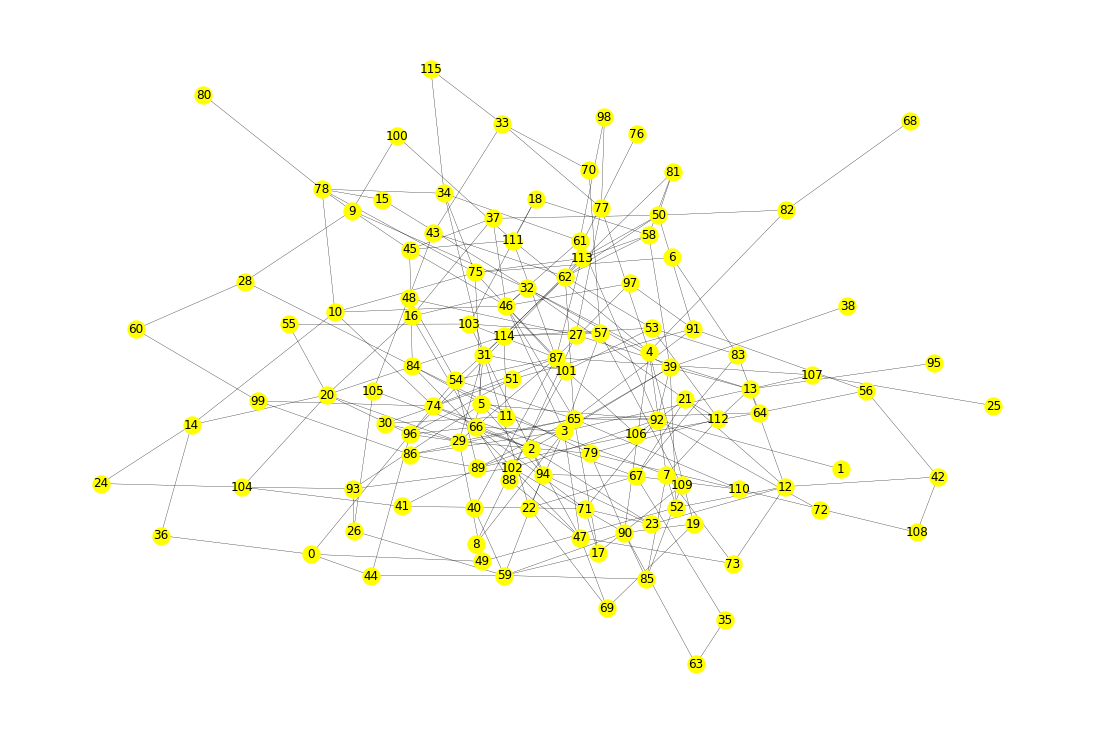

In [ ]:

# Создаем случайный граф размерностью nodes = 116 и количеством edges = 250  
G=nx.gnm_random_graph(116,250, seed=2)

# Визуализируем граф
pos = nx.spring_layout(G)
plt.figure(figsize=(15, 10))
nx.draw(G, pos=pos, with_labels=1, node_size=300, width=0.3, node_color='yellow')  # width=0.3 - толщина линий ; node_size=300 - размер вершин

In [ ]:
# Задаем случайные веса
list_of_current_weight = random.choices(range(5, 9), k = 116)

list_of_current_weight = { i : list_of_current_weight[i] for i in range(0, len(list_of_current_weight) ) }



In [ ]:
# Устанавливаем веса для графа
nx.set_node_attributes(G, list_of_current_weight, 'current_weight')

In [ ]:
# Вводим 2 эпицентра
random_two_epicenters = random.sample(range(0, 116), k = 2)
random_two_epicenters

for i in random_two_epicenters:
    G.nodes[i]['current_weight'] = 10 # max_load

In [ ]:
# Задаем красный цвет для эпицентров
color_map = ['red' if node == 10 else 'yellow' for node in nx.get_node_attributes(G, 'current_weight').values()]  

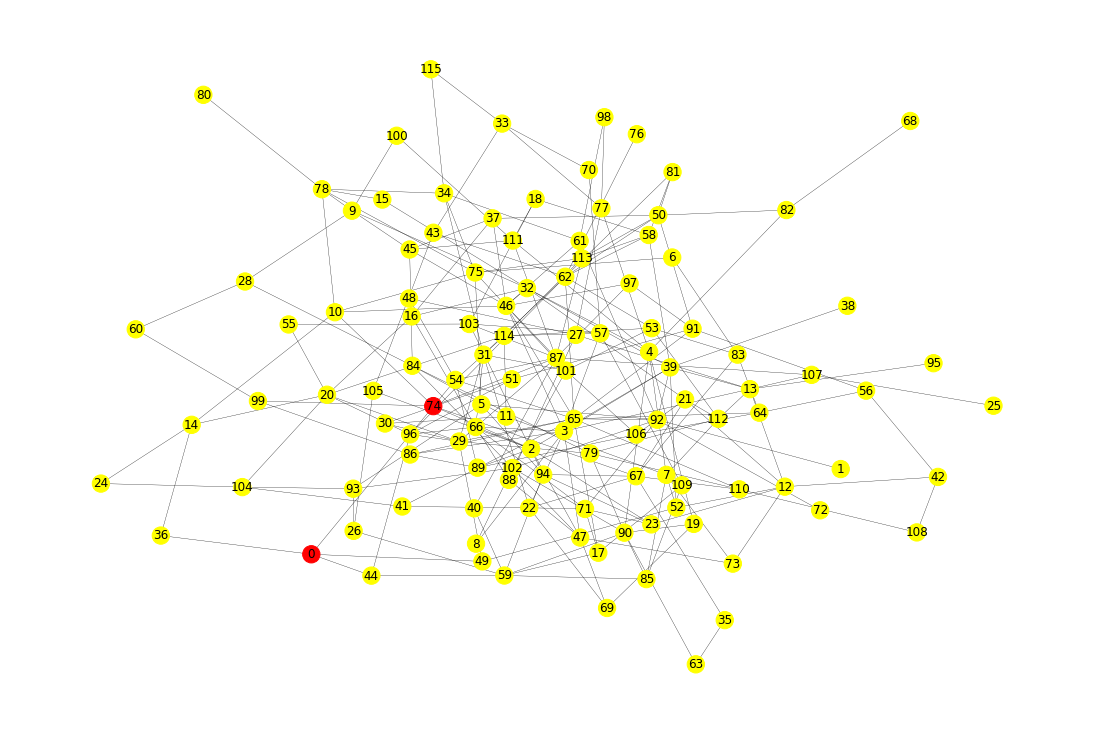

In [ ]:
# Визуализируем граф
plt.figure(figsize=(15, 10))
nx.draw(G,pos=pos, with_labels= 1 , node_size=300, width=0.3, node_color = color_map, font_color='black')

In [ ]:
# Функция разрушение графа
def remove_and_distribution(G):
    G = G.copy()
    count_of_nodes = []
    flag = 1
    iteration_list = []
    iteration = 0
    while flag:
        if (max(nx.get_node_attributes(G, 'current_weight').values(), default=0) < max_load):
            flag = 0
            break
        for node in [i for i in nx.get_node_attributes(G, 'current_weight') 
                     if nx.get_node_attributes(G, 'current_weight')[i] >= max_load]:
            load_of_node_value = G.nodes[node]['current_weight']
            if len(list(G.neighbors(node))) != 0:
                distribite_for_neighbors = load_of_node_value/len(list(G.neighbors(node)))
            for neighbor in G.neighbors(node):
                G.nodes[neighbor]['current_weight'] = G.nodes()[neighbor]['current_weight'] + distribite_for_neighbors
            G.remove_node(node)
            iteration+=1
           
        iteration_list.append(iteration)
        plt.figure(figsize = (15, 10))
        nx.draw(G, pos = pos, with_labels = 1, node_size = 150, width = 0.3, node_color = 'yellow', font_color = 'black')
        count_of_nodes.append(len(G.nodes))
        
    return count_of_nodes, iteration_list

In [ ]:
def remove_and_distribution_cycle(G):
    G = G.copy()
    list_of_current_weight = random.choices(range(5, 9), k = 116)
    list_of_current_weight = { i : list_of_current_weight[i] for i in range(0, len(list_of_current_weight) ) }
    nx.set_node_attributes(G, list_of_current_weight, 'current_weight')
    random_two_epicenters = random.sample(range(0, 116), k = 2)
    random_two_epicenters

    for j in random_two_epicenters:
        G.nodes[j]['current_weight'] = 10

    print(nx.get_node_attributes(G, 'current_weight'))
    color_map = ['red' if node == max_load else 'yellow' for node in nx.get_node_attributes(G, 'current_weight').values()]
    plt.figure(figsize=(15, 10))
    nx.draw(G, pos = pos, with_labels = 1, node_size = 200, width = 0.3, node_color = color_map, font_color = 'black')
    count_of_nodes, iteration_list = remove_and_distribution(G)
    return count_of_nodes, iteration_list

{0: 10, 1: 6, 2: 7, 3: 7, 4: 5, 5: 7, 6: 8, 7: 8, 8: 7, 9: 8, 10: 8, 11: 6, 12: 6, 13: 7, 14: 5, 15: 6, 16: 7, 17: 7, 18: 6, 19: 7, 20: 7, 21: 8, 22: 8, 23: 5, 24: 8, 25: 8, 26: 8, 27: 7, 28: 7, 29: 8, 30: 7, 31: 5, 32: 8, 33: 8, 34: 8, 35: 7, 36: 8, 37: 8, 38: 5, 39: 5, 40: 7, 41: 5, 42: 8, 43: 8, 44: 8, 45: 5, 46: 8, 47: 7, 48: 7, 49: 7, 50: 5, 51: 6, 52: 5, 53: 6, 54: 5, 55: 6, 56: 8, 57: 6, 58: 8, 59: 8, 60: 5, 61: 7, 62: 5, 63: 7, 64: 7, 65: 7, 66: 8, 67: 7, 68: 8, 69: 8, 70: 6, 71: 8, 72: 7, 73: 8, 74: 7, 75: 5, 76: 8, 77: 8, 78: 6, 79: 5, 80: 8, 81: 6, 82: 6, 83: 7, 84: 7, 85: 8, 86: 6, 87: 7, 88: 5, 89: 7, 90: 7, 91: 6, 92: 6, 93: 7, 94: 8, 95: 5, 96: 8, 97: 5, 98: 7, 99: 7, 100: 6, 101: 5, 102: 7, 103: 8, 104: 5, 105: 5, 106: 7, 107: 7, 108: 8, 109: 10, 110: 8, 111: 5, 112: 6, 113: 5, 114: 6, 115: 6}


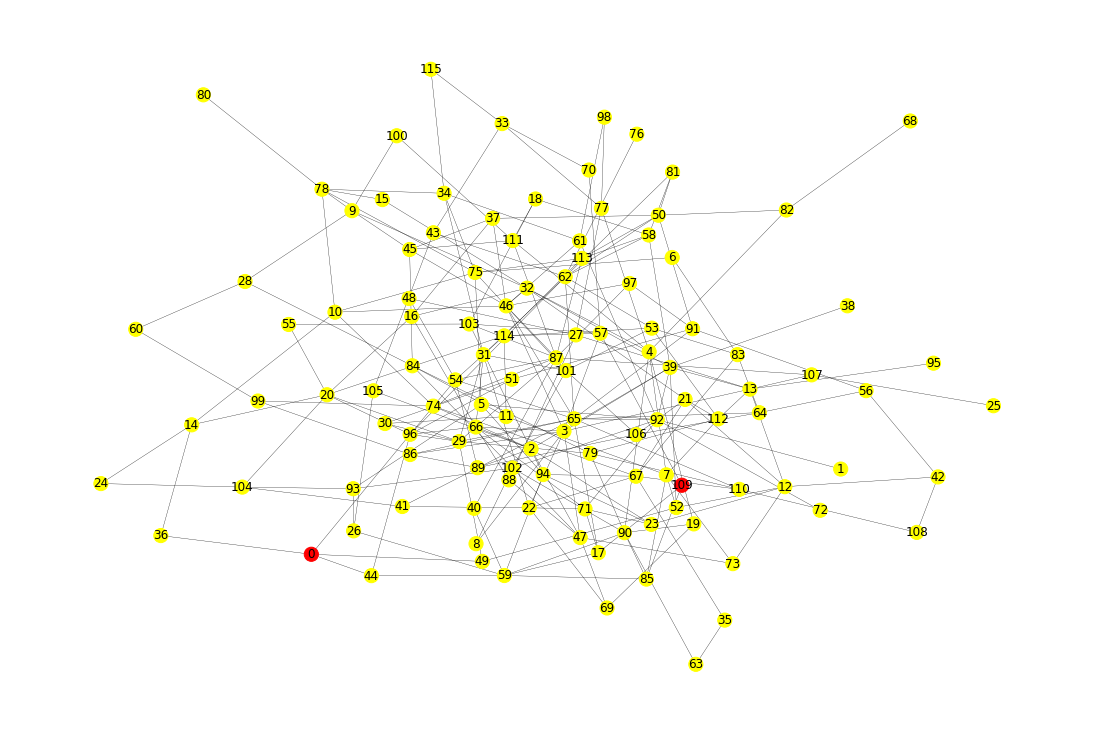

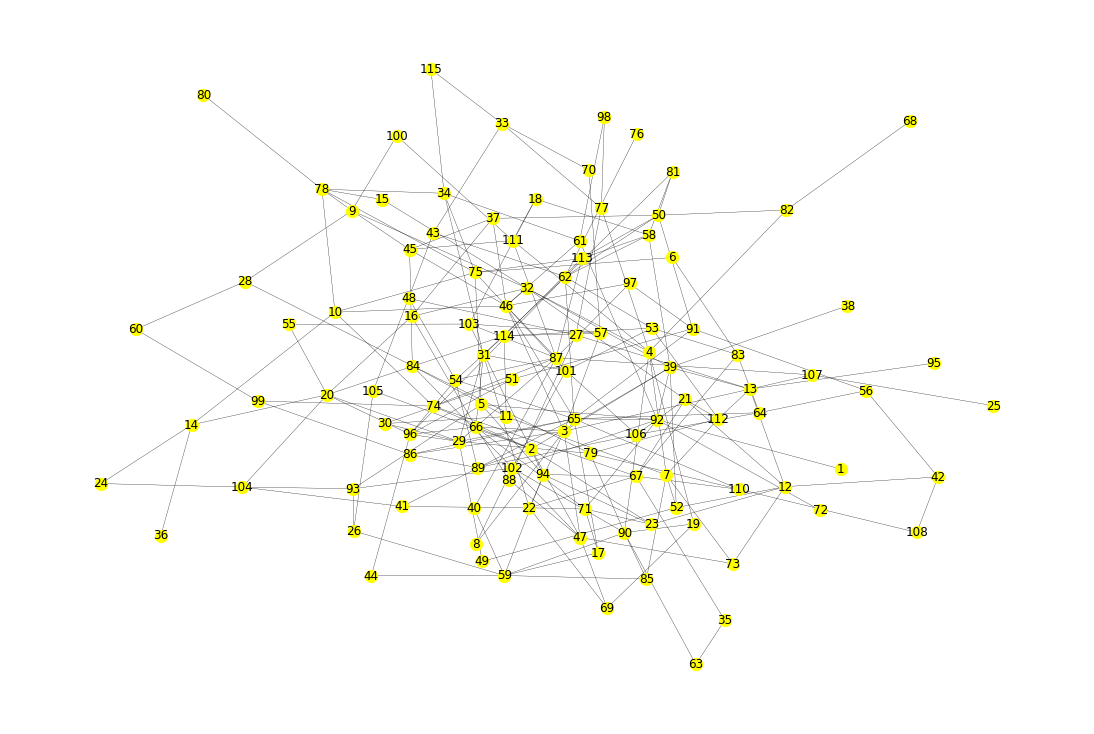

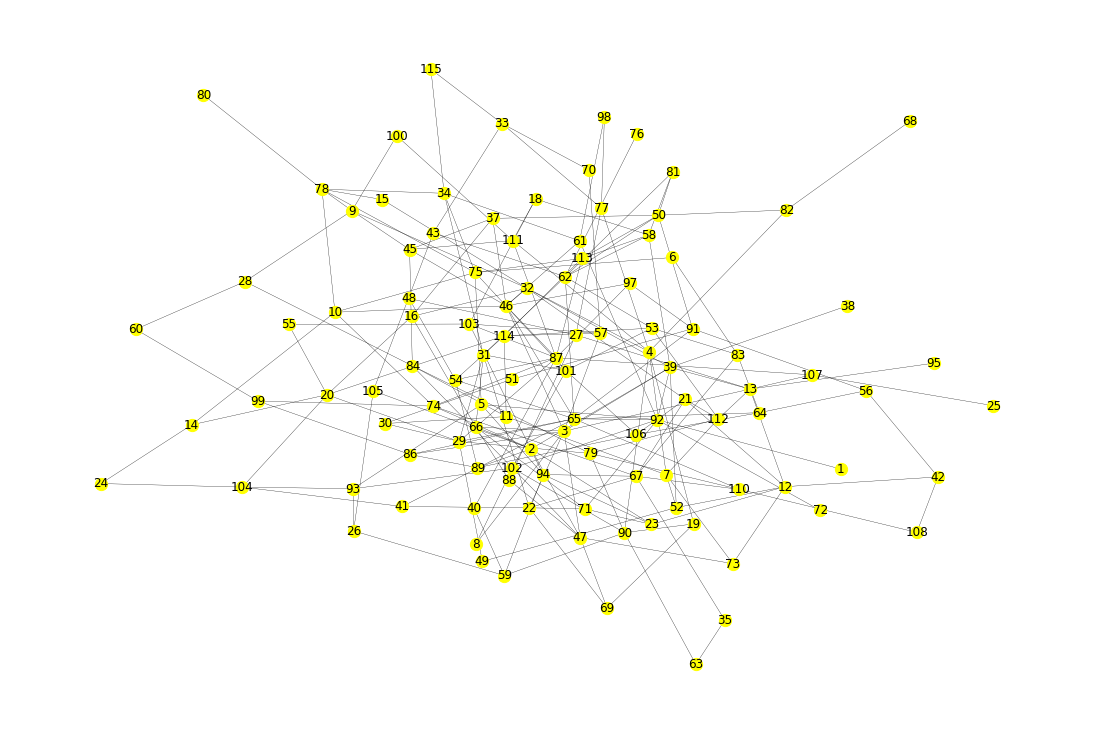

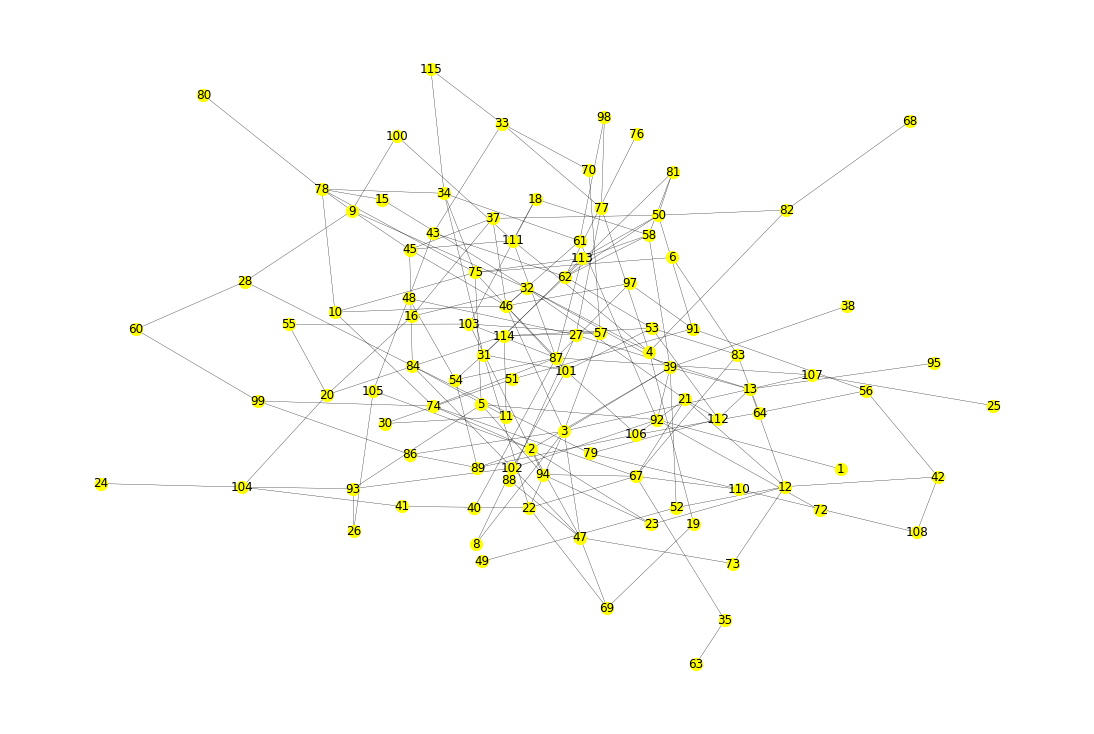

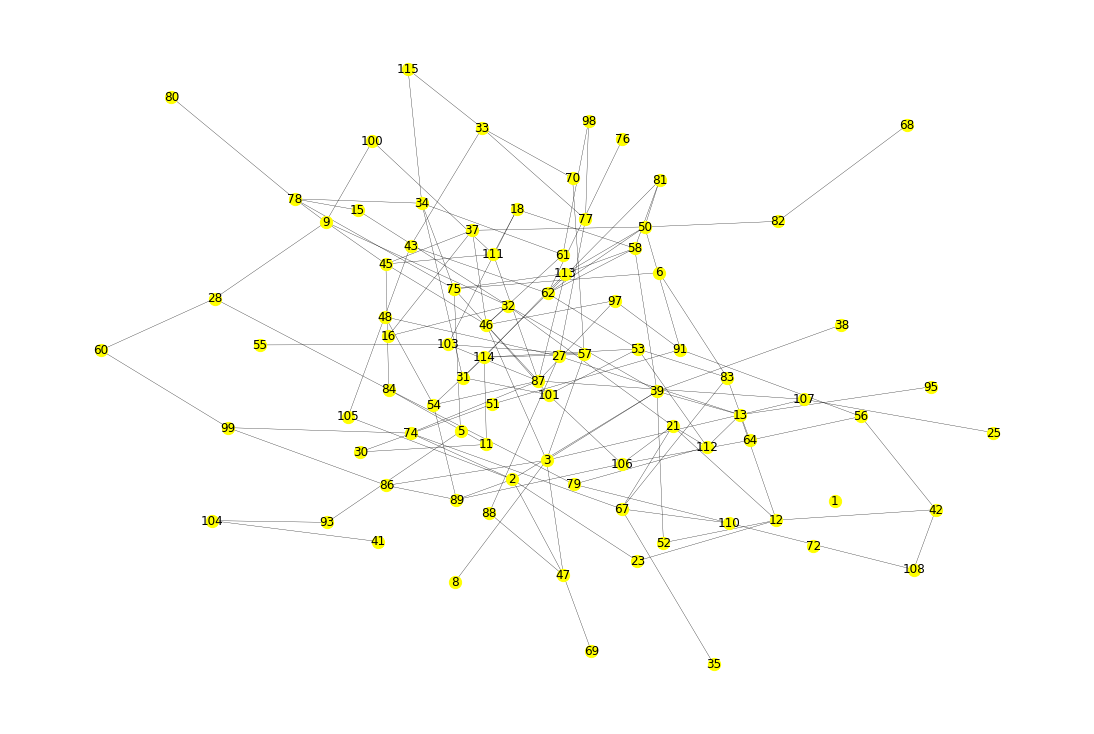

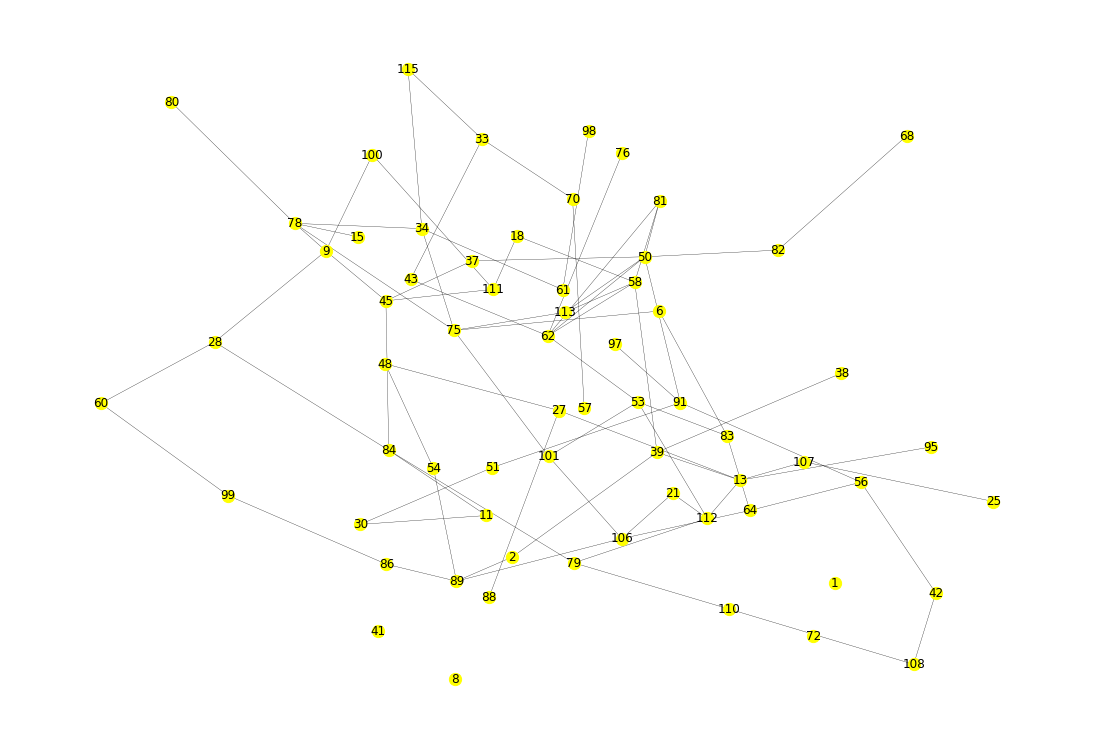

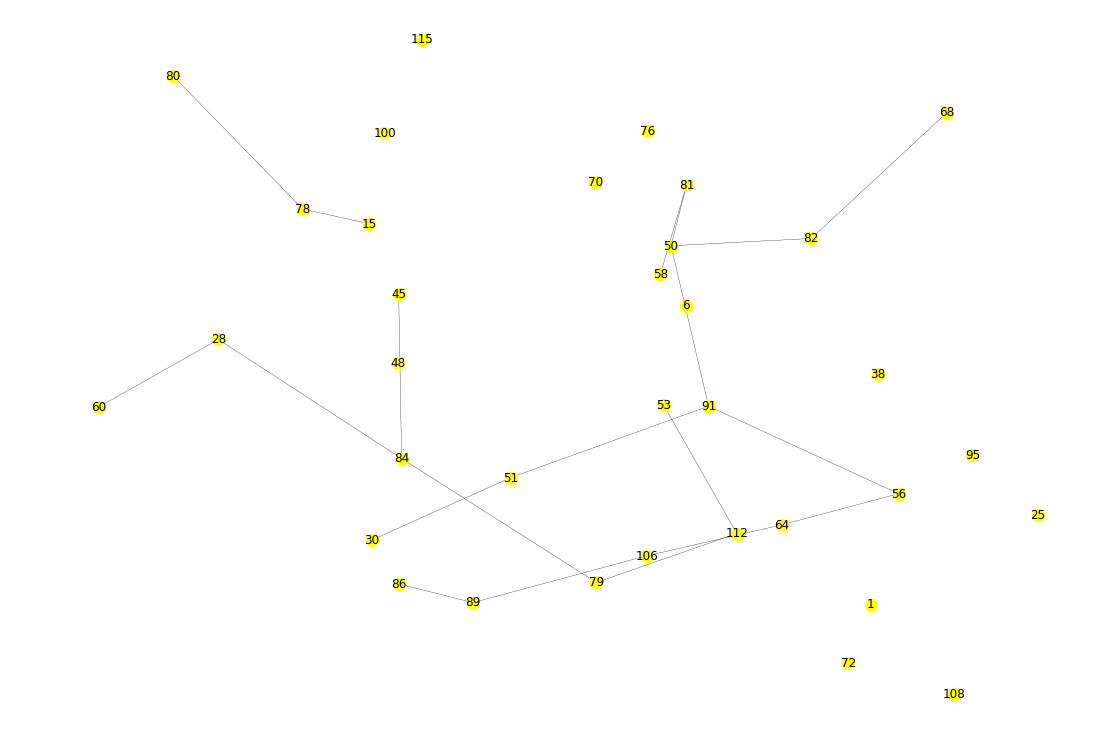

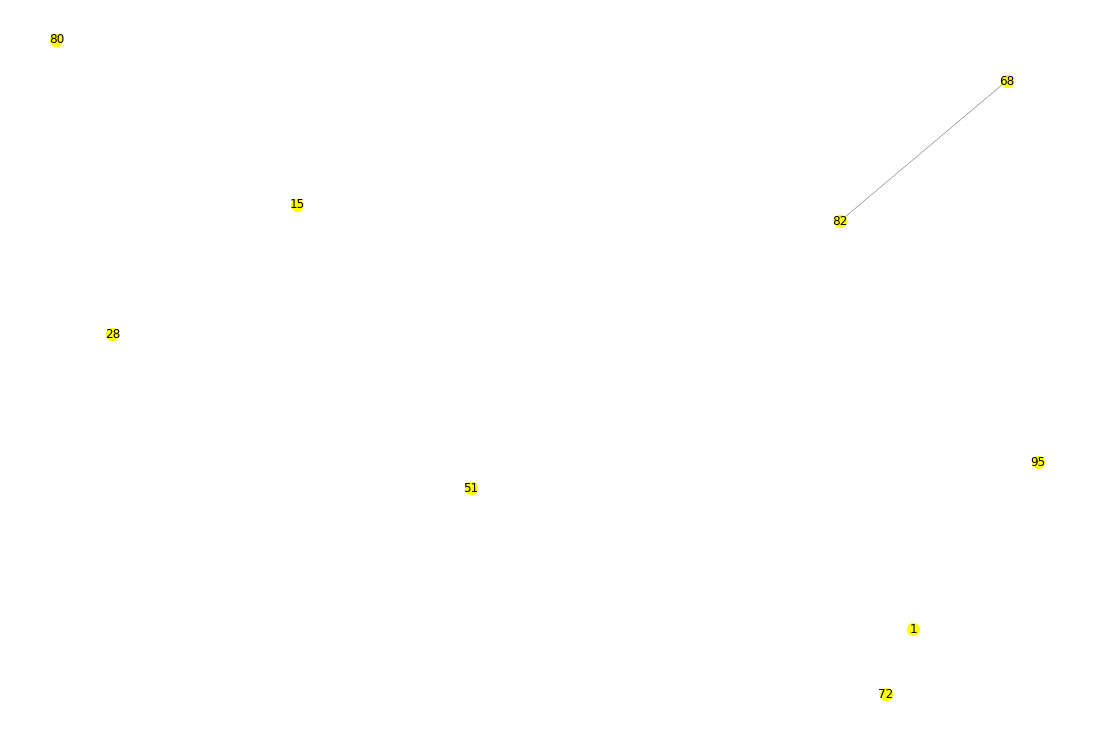

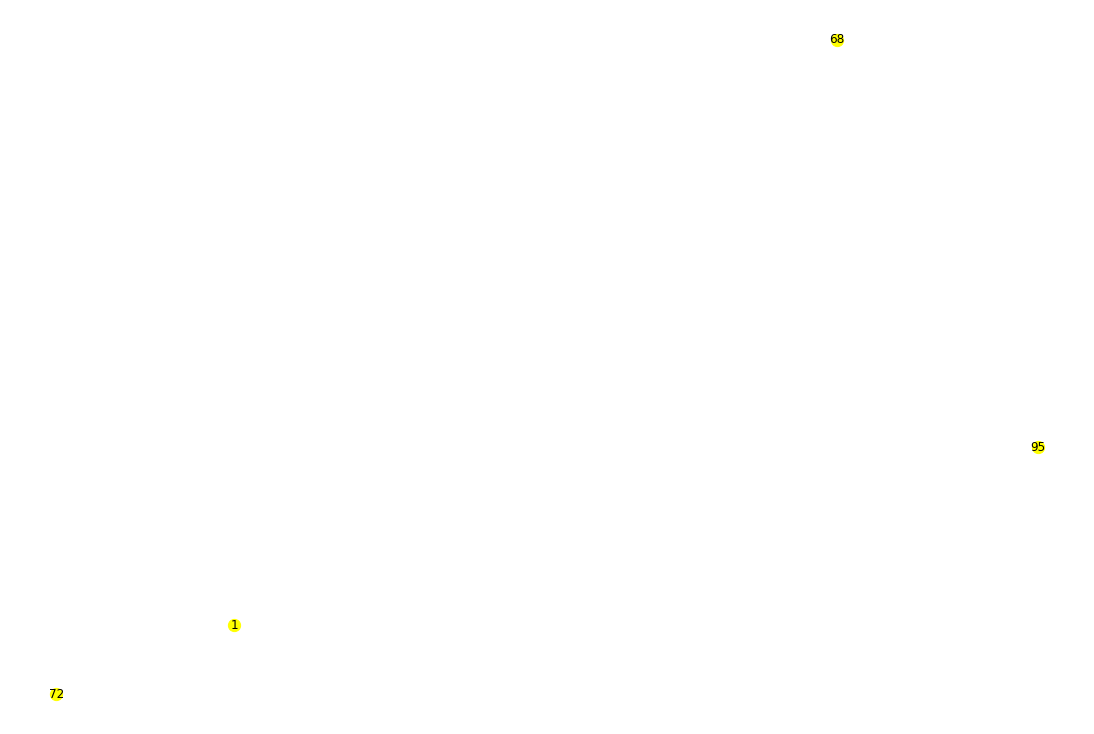

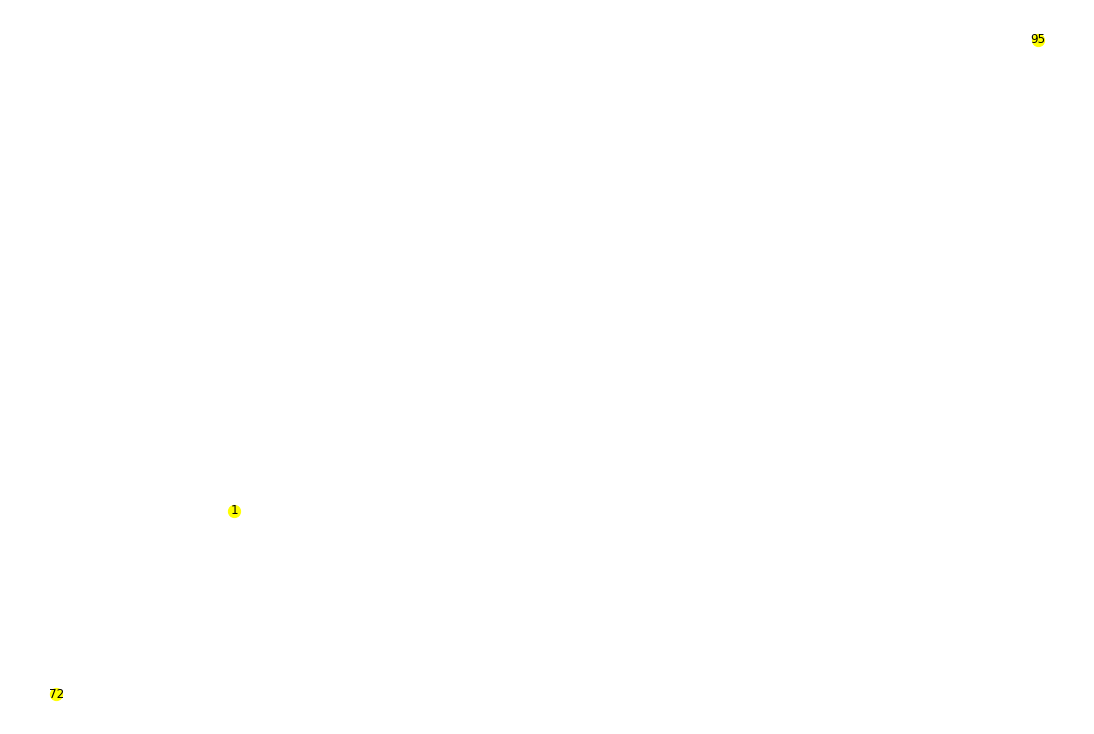

In [ ]:
# Запускаем итерацию 
count_of_nodes, iteration_list = remove_and_distribution_cycle(G)

In [ ]:
count_of_nodes

[114, 109, 101, 87, 65, 35, 9, 4, 3]

In [ ]:
iteration_list

[2, 7, 15, 29, 51, 81, 107, 112, 113]